1. Statistical analysis

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [9]:
files = ['U98.xlsx', 'U99.xlsx', 'U1400.xlsx', 'U1401.xlsx', 'R98.xlsx', 'R99.xlsx', 'R1400.xlsx', 'R1401.xlsx']

1.1 descriptive statistics


In [10]:
p1_names = []
for file in files:
    file_name = 'p1_' +file.split('.')[0]
    locals()[file_name] = pd.read_excel(file, sheet_name=1)
    p1_names.append(file_name)

1.1.1 Histogeram



- degrees

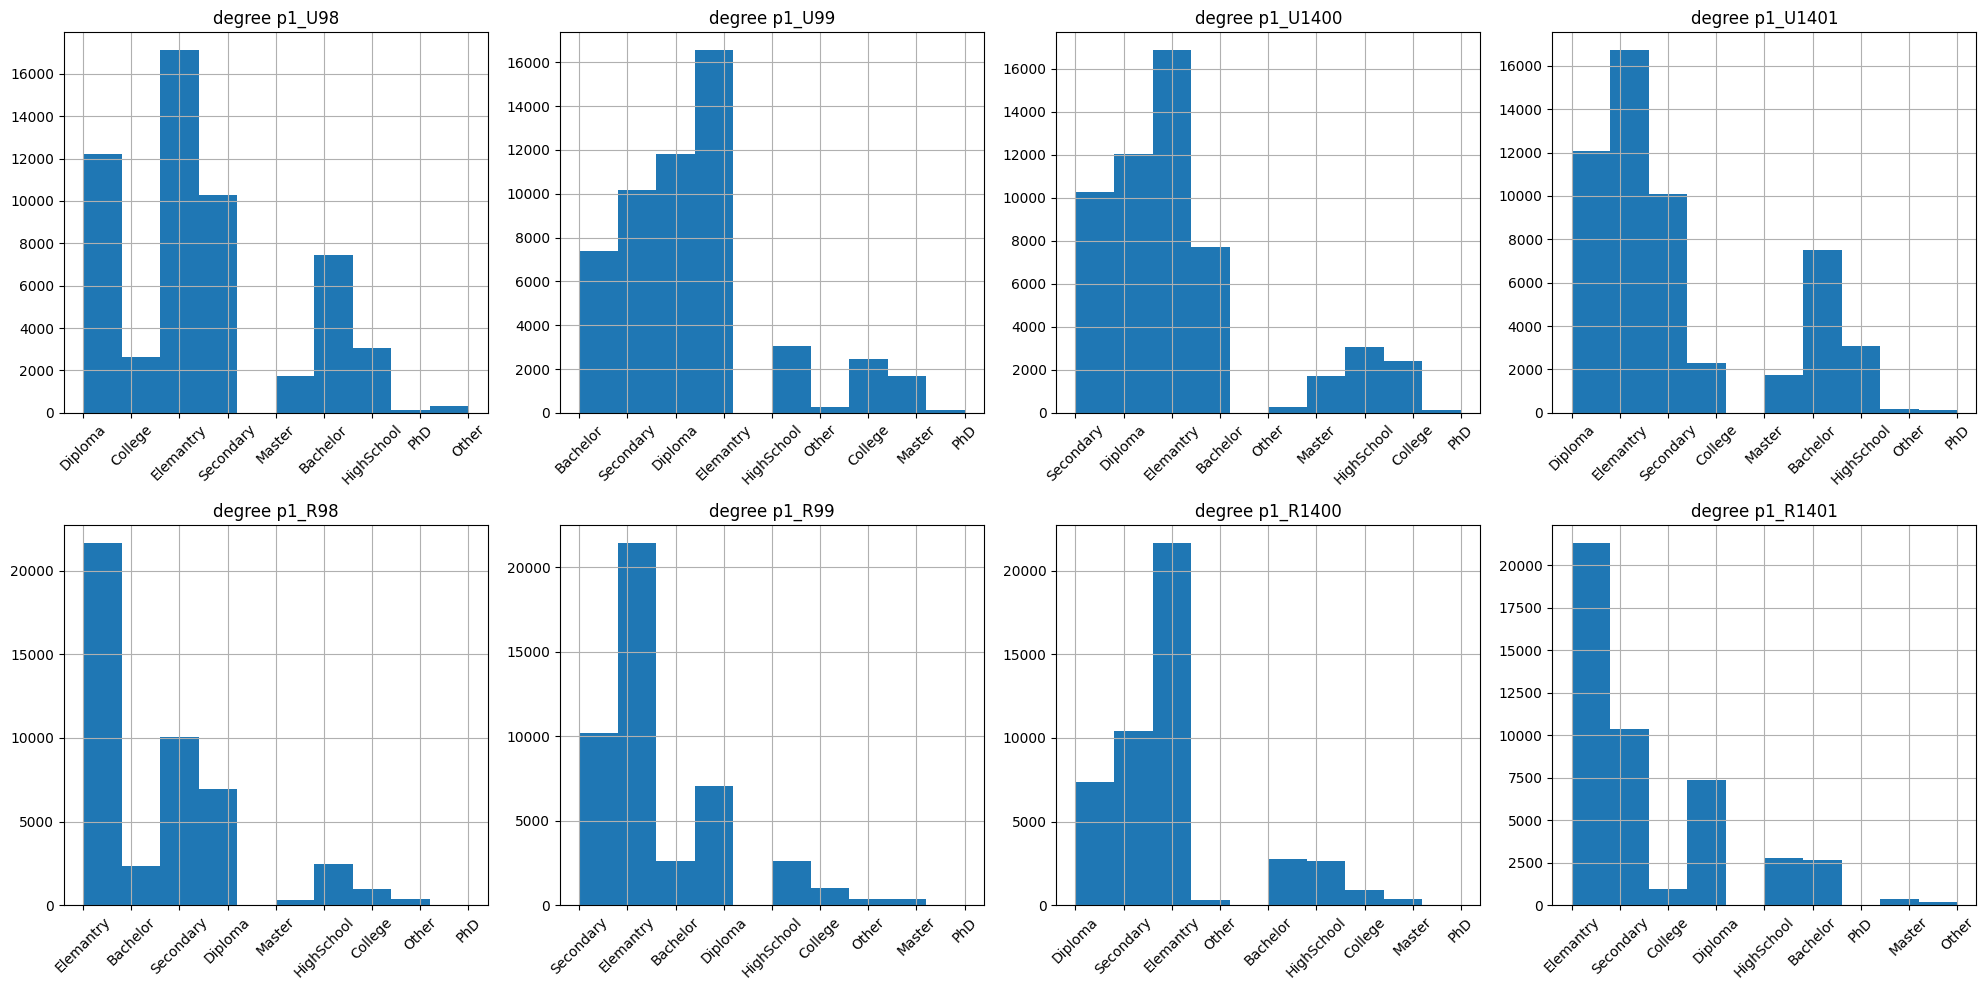

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, ax in zip(p1_names, axes.flatten()):
    df = globals()[i]
    df['degree'].hist(ax=ax)
    ax.set_title('degree ' + str(i))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- ages

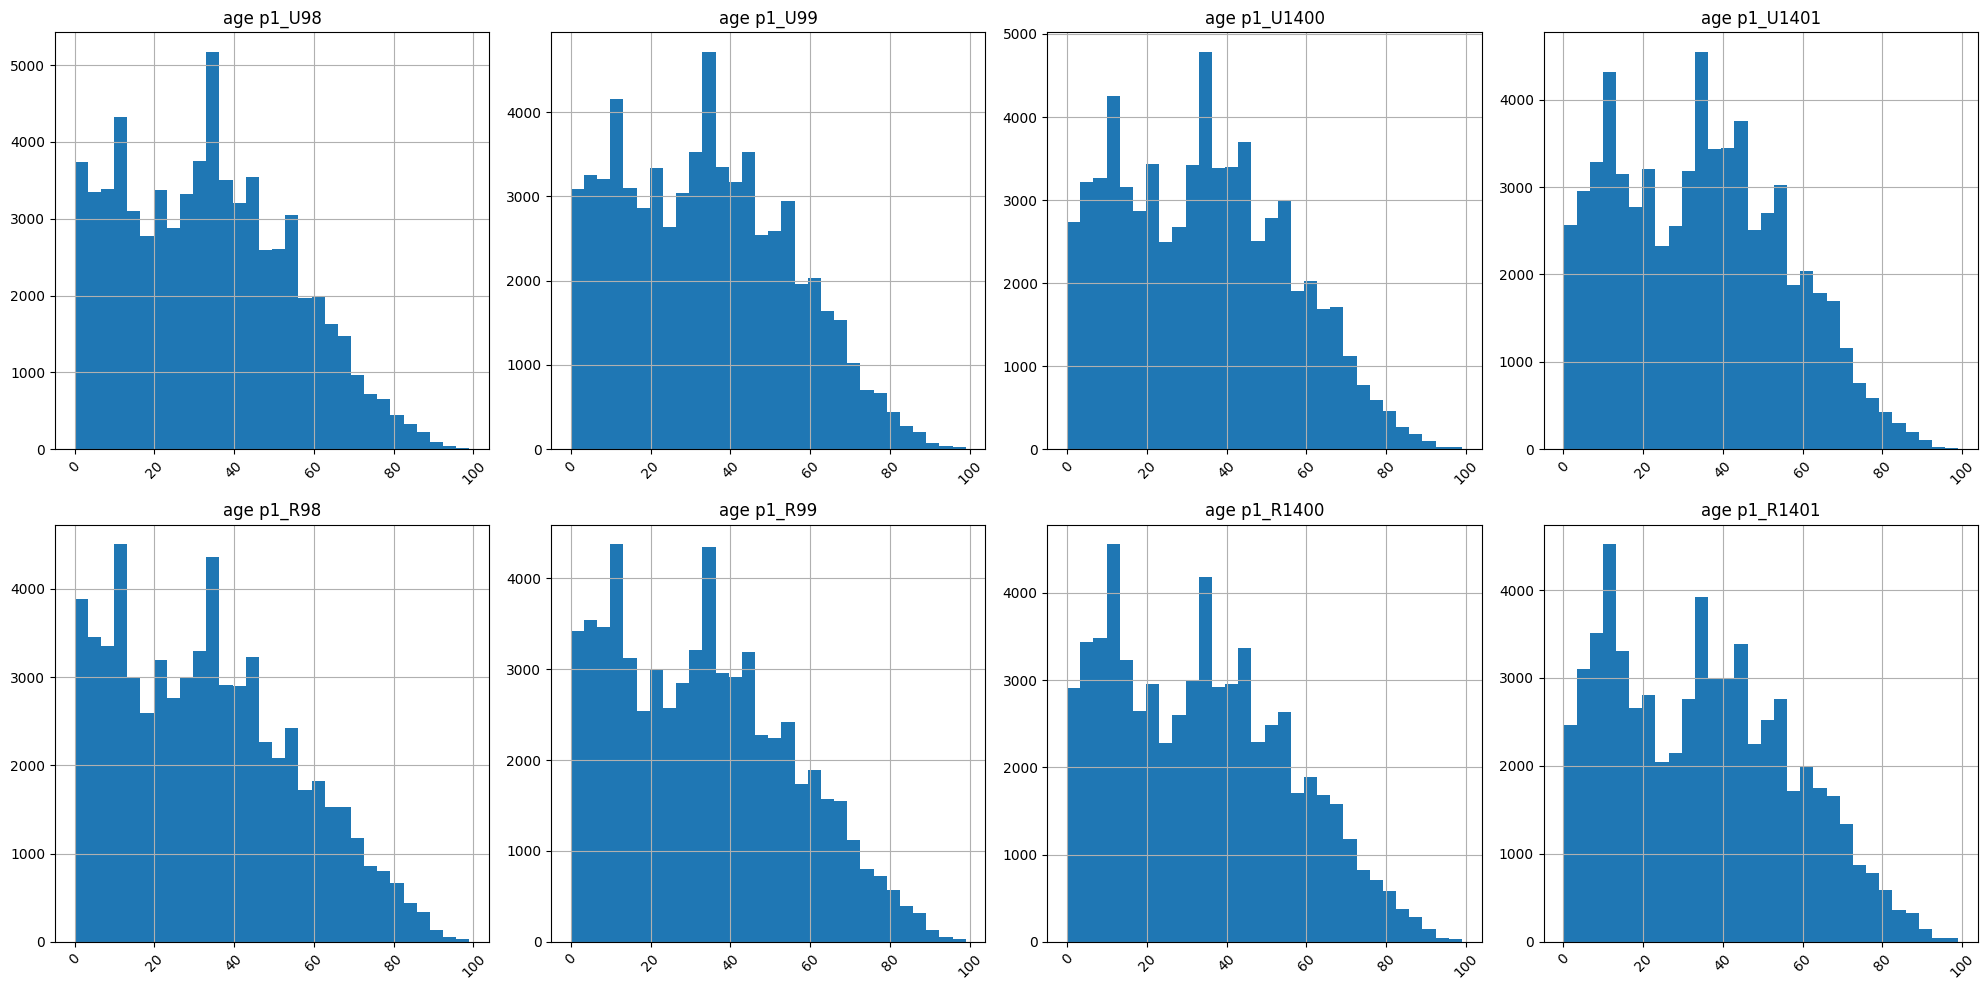

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, ax in zip(p1_names, axes.flatten()):
    df = globals()[i]
    df['age'].hist(bins=30, ax=ax)
    ax.set_title('age ' + str(i))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- relations

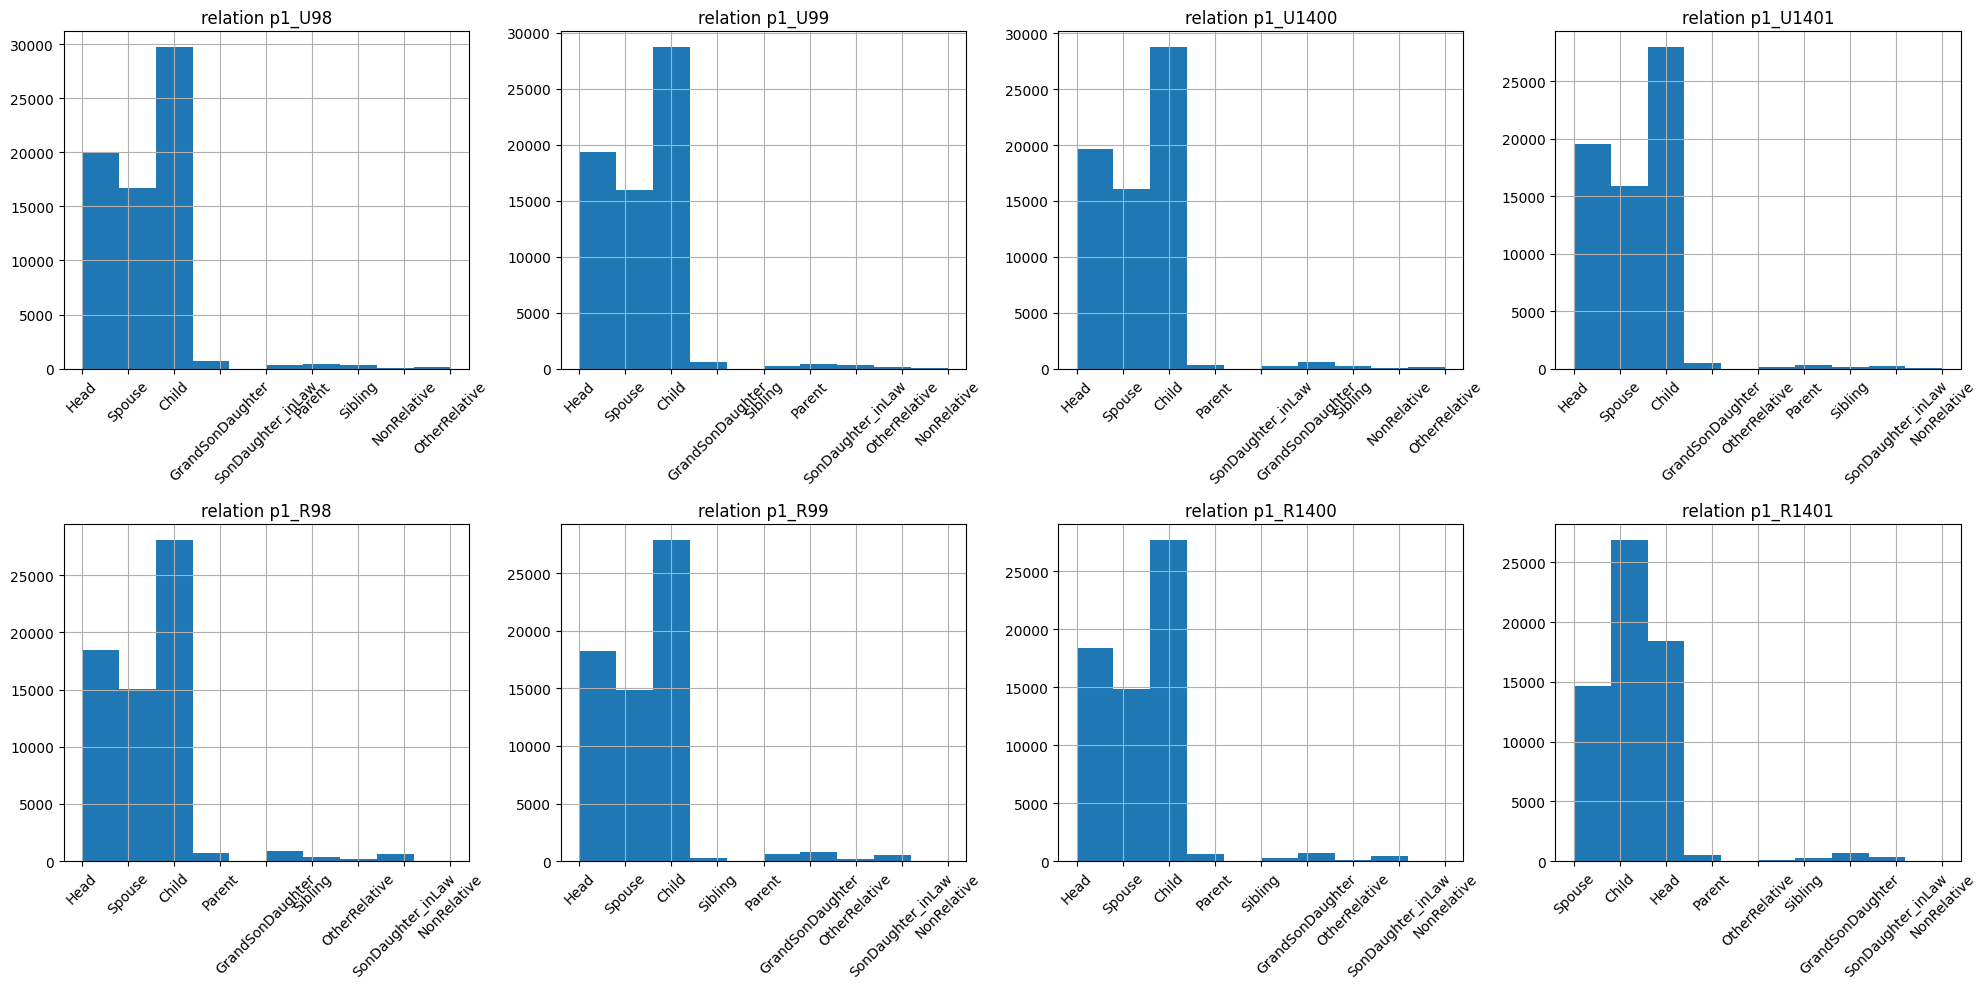

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, ax in zip(p1_names, axes.flatten()):
    df = globals()[i]
    df['relation'].hist(ax=ax)
    ax.set_title('relation ' + str(i))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- occupationalst

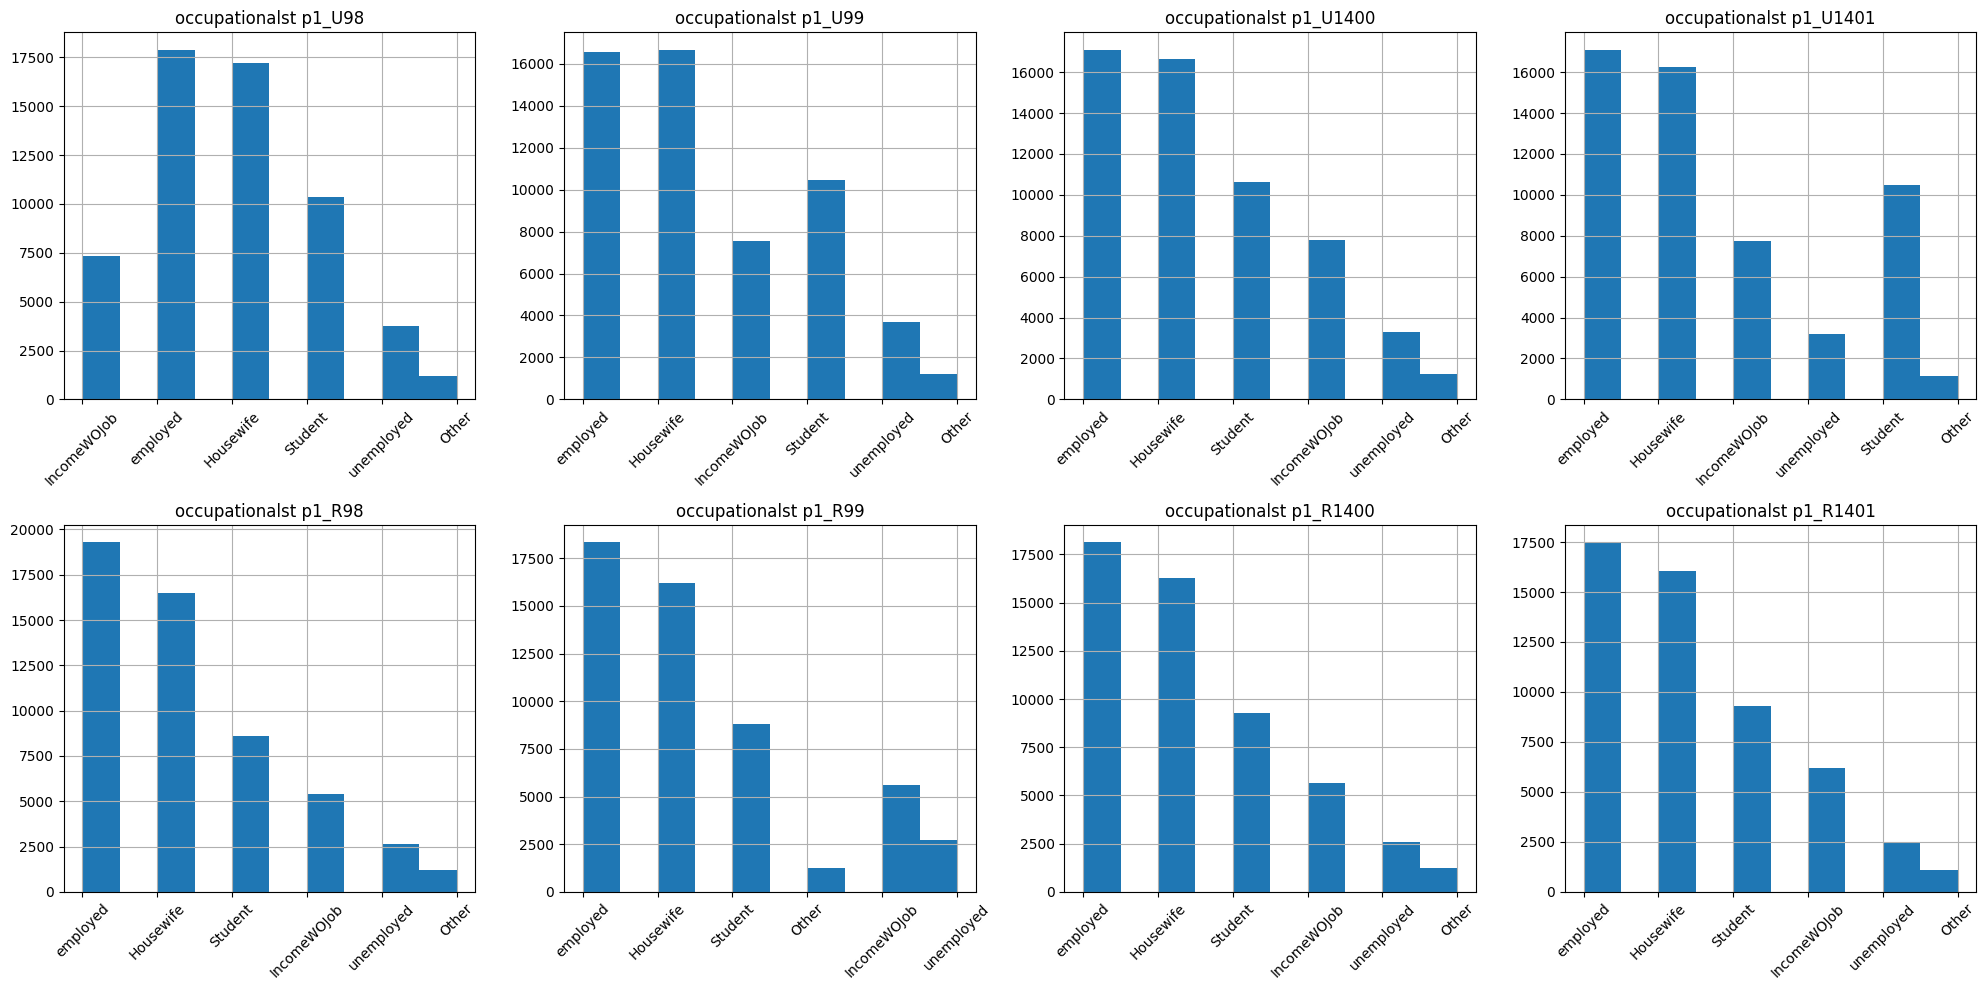

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, ax in zip(p1_names, axes.flatten()):
    df = globals()[i]
    df['occupationalst'].hist(ax=ax)
    ax.set_title('occupationalst ' + str(i))
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1.1.2 Scatter Plot


In [15]:
p3S11_names = []
for file in files:
    file_name = 'p3S11_' +file.split('.')[0]
    locals()[file_name] = pd.read_excel(file, sheet_name=13)
    p3S11_names.append(file_name)

In [16]:
P3S11U = {}
for i in p3S11_names[:4]:
    df = globals()[i]
    P3S11U[i] = df.groupby('Address')['value'].sum()
P3S11U = pd.DataFrame(P3S11U)


P3S11R = {}
for i in p3S11_names[4:]:
    df = globals()[i]
    P3S11R[i] = df.groupby('Address')['value'].sum()
P3S11R = pd.DataFrame(P3S11R)

In [17]:
P3S11U.info(), P3S11R.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18179 entries, 10001000108 to 13006383832
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p3S11_U98    7009 non-null   float64
 1   p3S11_U99    4135 non-null   float64
 2   p3S11_U1400  5852 non-null   float64
 3   p3S11_U1401  5707 non-null   float64
dtypes: float64(4)
memory usage: 710.1 KB
<class 'pandas.core.frame.DataFrame'>
Index: 11618 entries, 20001383920 to 23006709841
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   p3S11_R98    4444 non-null   float64
 1   p3S11_R99    2757 non-null   float64
 2   p3S11_R1400  3811 non-null   float64
 3   p3S11_R1401  3817 non-null   float64
dtypes: float64(4)
memory usage: 453.8 KB


(None, None)

In [18]:
P3S11U

,p3S11_U98,p3S11_U99,p3S11_U1400,p3S11_U1401
Address,,,,
10001000108,700000.0,NaN,NaN,NaN
10001000116,NaN,550000.0,NaN,NaN
10001000120,NaN,400000.0,2100000.0,NaN
10001000123,NaN,650000.0,NaN,NaN
10001000126,NaN,NaN,NaN,5000000.0
...,...,...,...,...
13006383815,NaN,550000.0,NaN,NaN
13006383821,NaN,4948000.0,NaN,NaN
13006383824,NaN,650000.0,NaN,NaN


In [19]:
P3S11R

,p3S11_R98,p3S11_R99,p3S11_R1400,p3S11_R1401
Address,,,,
20001383920,300000.0,NaN,NaN,NaN
20001383926,NaN,100000.0,NaN,NaN
20001383941,NaN,NaN,NaN,15000000.0
20001384021,NaN,NaN,700000.0,NaN
20001384022,NaN,NaN,1500000.0,NaN
...,...,...,...,...
23006709738,NaN,NaN,NaN,11650000.0
23006709741,NaN,NaN,NaN,2800000.0
23006709826,NaN,NaN,NaN,600000.0


In [20]:
# Scatter Plot
# x = 
# y = 

# plt.figure(figsize=(12, 6))
# plt.scatter()
# plt.title('Histogram of Summed Values')
# plt.xlabel('Summed Values')
# plt.ylabel('years')
# plt.grid(True)
# plt.show()


1.1.3 Correlation Matrix

In [21]:
p3_names = []
for file in files:
    file_name = 'p3_' +file.split('.')[0]
    locals()[file_name] = pd.read_excel(file, sheet_name=[3, 5, 6, 8])
    p3_names.append(file_name)

In [22]:
file_sums = {}

for file in files[:4]:
    file_name = 'p3_' + file.split('.')[0]
    p3_data = pd.read_excel(file, sheet_name=[3, 5, 6, 8])
    
    file_sum = pd.DataFrame()

    for sheet_num, sheet_df in p3_data.items():
        sheet_sum = sheet_df.groupby('Address')['value'].sum()
        file_sum[f'Sheet_{sheet_num}_sum'] = sheet_sum
    
    file_sum_agg = file_sum.groupby('Address').sum()
    file_sums[file_name] = file_sum_agg

P3U_sums = pd.concat(file_sums.values(), keys=file_sums.keys())
P3U_sums['Total_sum'] = P3U_sums.sum(axis=1)
P3U_sums = P3U_sums.drop(['Sheet_3_sum', 'Sheet_5_sum', 'Sheet_6_sum', 'Sheet_8_sum'], axis=1)

P3U_sums

Total_sum
         Address                 
p3_U98   10001000108   24686000.0
         10001000111   39898000.0
         10001000114   14042000.0
         10001000117   20968000.0
         10001000120   22587000.0
...                           ...
p3_U1401 13006383827   61957000.0
         13006383832  118590000.0
         13006383835   52930000.0
         13006383838   84870000.0
         13006383841   53460000.0

[78108 rows x 1 columns]

In [23]:
file_sums = {}

for file in files[4:]:
    file_name = 'p3_' + file.split('.')[0]
    p3_data = pd.read_excel(file, sheet_name=[3, 5, 6, 8])
    
    file_sum = pd.DataFrame()

    for sheet_num, sheet_df in p3_data.items():
        sheet_sum = sheet_df.groupby('Address')['value'].sum()
        file_sum[f'Sheet_{sheet_num}_sum'] = sheet_sum
    
    file_sum_agg = file_sum.groupby('Address').sum()
    file_sums[file_name] = file_sum_agg

P3R_sums = pd.concat(file_sums.values(), keys=file_sums.keys())
P3R_sums['Total_sum'] = P3R_sums.sum(axis=1)
P3R_sums = P3R_sums.drop(['Sheet_3_sum', 'Sheet_5_sum', 'Sheet_6_sum', 'Sheet_8_sum'], axis=1)

P3R_sums

Total_sum
         Address                 
p3_R98   20001383908   28115000.0
         20001383911   11922200.0
         20001383915   14668000.0
         20001383916   15227500.0
         20001383920   16412500.0
...                           ...
p3_R1401 23006709826   99821500.0
         23006709832   94074000.0
         23006709835  107554200.0
         23006709838   58600000.0
         23006709841   62165320.0

[73135 rows x 1 columns]

In [24]:
# Correlation Matrix
# p3 = p3.loc[:, p3.var() != 0]
# correlation_matrix = p3.corr()
# correlation_matrix
# plt.matshow(correlation_matrix)
# plt.show()

1.2 hypothesis test

In [25]:
ChB_Address = []
for file in files:
    df = pd.read_excel(file, sheet_name=0)
    filtered_df = df[df['province'] == 'CharmahalBakhtiari']
    if not filtered_df.empty:
        ChB_Address.extend(filtered_df['Address'])

In [26]:
# sheets = {
#     17 : {'usecols': ['netincome_w_y']},
#     18 : {'usecols': ['income_s_y']},
#     19 : {'usecols': ['income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']},
#     20 : {'usecols': ['subsidy']}}

# dfs = {}
# for file in files:
#     with pd.ExcelFile(file) as xlsx:
#         for sheet_name, params in sheets.items():
#             dfs[sheet_name] = xlsx.parse(sheet_name=sheet_name, **params)

1.2.1 proprecess

- Urban/ CharmahalBakhtiari

In [65]:
for file in files[:4]:
    dfu1 = pd.read_excel(file, sheet_name=17)
    dfu1 = dfu1[['Address', 'netincome_w_y']]
    dfu1 = dfu1[dfu1['Address'].isin(ChB_Address)]

for file in files[:4]:
    dfu2 = pd.read_excel(file, sheet_name=18)
    dfu2 = dfu2[['Address', 'income_s_y']]
    dfu2 = dfu2[dfu2['Address'].isin(ChB_Address)]

for file in files[:4]:
    dfu3 = pd.read_excel(file, sheet_name=19)
    dfu3 = dfu3[['Address', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    dfu3 = dfu3[dfu3['Address'].isin(ChB_Address)]

for file in files[:4]:
    dfu4 = pd.read_excel(file, sheet_name=20)
    dfu4 = dfu4[['Address', 'subsidy']]
    dfu4 = dfu4[dfu4['Address'].isin(ChB_Address)]

In [66]:
merged_dfu = pd.merge(dfu1, dfu2, on='Address', how='outer')
merged_dfu = pd.merge(merged_dfu, dfu3, on='Address', how='outer')
merged_dfu = pd.merge(merged_dfu, dfu4, on='Address', how='outer')
merged_dfu.set_index('Address', inplace=True)
merged_dfu.fillna(0, inplace=True)

In [67]:
merged_dfu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732 entries, 11401171729 to 11409183541
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   netincome_w_y    1732 non-null   float64
 1   income_s_y       1732 non-null   object 
 2   income_pension   1732 non-null   float64
 3   income_rent      1732 non-null   float64
 4   income_interest  1732 non-null   float64
 5   income_aid       1732 non-null   float64
 6   income_resale    1732 non-null   float64
 7   income_transfer  1732 non-null   float64
 8   subsidy          1732 non-null   float64
dtypes: float64(8), object(1)
memory usage: 135.3+ KB


In [68]:
merged_dfu['income_s_y'] = pd.to_numeric(merged_dfu['income_s_y'], errors='coerce')
merged_dfu['Total'] = merged_dfu.sum(axis=1)
summed_totals = merged_dfu.groupby('Address').sum().reset_index()

In [69]:
ChB_U = summed_totals[['Address', 'Total']]
ChB_U

,Address,Total
0,11401171729,2.914730e+09
1,11401171732,1.515240e+09
2,11401171735,1.283650e+08
3,11401171738,8.270180e+09
4,11401171741,3.890550e+09
...,...,...
652,11409183526,1.288370e+09
653,11409183532,1.916450e+09
654,11409183535,1.548680e+09
655,11409183538,1.624340e+09


- Rural/ CharmahalBakhtiari

In [71]:
for file in files[4:]:
    dfr1 = pd.read_excel(file, sheet_name=17)
    dfr1 = dfr1[['Address', 'netincome_w_y']]
    dfr1 = dfr1[dfr1['Address'].isin(ChB_Address)]

for file in files[4:]:
    dfr2 = pd.read_excel(file, sheet_name=18)
    dfr2 = dfr2[['Address', 'income_s_y']]
    dfr2 = dfr2[dfr2['Address'].isin(ChB_Address)]

for file in files[4:]:
    dfr3 = pd.read_excel(file, sheet_name=19)
    dfr3 = dfr3[['Address', 'income_pension', 'income_rent', 'income_interest', 'income_aid', 'income_resale', 'income_transfer']]
    dfr3 = dfr3[dfr3['Address'].isin(ChB_Address)]

for file in files[4:]:
    dfr4 = pd.read_excel(file, sheet_name=20)
    dfr4 = dfr4[['Address', 'subsidy']]
    dfr4 = dfr4[dfr4['Address'].isin(ChB_Address)]

In [72]:
merged_dfr = pd.merge(dfr1, dfr2, on='Address', how='outer')
merged_dfr = pd.merge(merged_dfr, dfr3, on='Address', how='outer')
merged_dfr = pd.merge(merged_dfr, dfr4, on='Address', how='outer')
merged_dfr.set_index('Address', inplace=True)
merged_dfr.fillna(0, inplace=True)

In [73]:
merged_dfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1350 entries, 21401545225 to 21409553741
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   netincome_w_y    1350 non-null   float64
 1   income_s_y       1350 non-null   object 
 2   income_pension   1350 non-null   int64  
 3   income_rent      1350 non-null   int64  
 4   income_interest  1350 non-null   int64  
 5   income_aid       1350 non-null   int64  
 6   income_resale    1350 non-null   int64  
 7   income_transfer  1350 non-null   int64  
 8   subsidy          1350 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 105.5+ KB


In [74]:
merged_dfr['income_s_y'] = pd.to_numeric(merged_dfr['income_s_y'], errors='coerce')
merged_dfr['Total'] = merged_dfr.sum(axis=1)
summed_total = merged_dfr.groupby('Address').sum().reset_index()


In [75]:
ChB_R = summed_total[['Address', 'Total']]
ChB_R

,Address,Total
0,21401545225,1.792095e+09
1,21401545226,3.010710e+09
2,21401545232,5.308995e+09
3,21401545235,2.547100e+09
4,21401545238,5.028640e+09
...,...,...
482,21409553726,1.537350e+09
483,21409553729,1.533040e+09
484,21409553732,3.996600e+09
485,21409553735,2.254400e+08


1.2.2 P-value

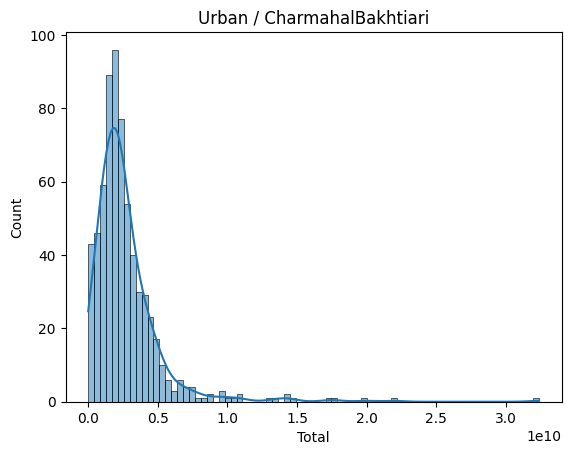

In [82]:
sns.histplot(ChB_U['Total'], kde=True)
plt.title('Urban / CharmahalBakhtiari')
plt.show()

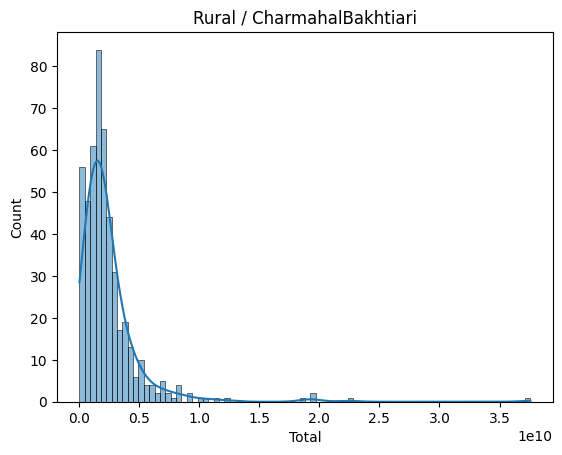

In [83]:
sns.histplot(ChB_R['Total'], kde=True)
plt.title('Rural / CharmahalBakhtiari')
plt.show()

نمودار به تنهایی نرمال نبودن توزیع را نشان می دهد اما برای اطمینان میتوان تست شپیرو نیز زد.

In [84]:
U_test_stat, U_p_value = sp.stats.shapiro(ChB_U['Total'])
U_p_value

7.72061149941191e-35

In [85]:
R_test_stat, R_p_value = sp.stats.shapiro(ChB_R['Total'])
R_p_value

2.554191153582824e-33

- U-Test

In [86]:
u_statistic, p_value = sp.stats.mannwhitneyu(ChB_U['Total'], ChB_R['Total'])
p_value

0.00011716769699150532

از آنجایی که از 0.05 و حتی 0.01 کمتر است فرض صفر رد میشود؛
پس درآمد خانوار های شهری و روستایی در استان چهارمحال و بختیاری باهم برابر نیستند و با یکدیگر تفاوت معنی داری دارند.